In [1]:
import numpy as np
import pandas as pd
from scipy import stats, sparse
import bottleneck

In [128]:
df = pd.read_csv("/grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/comparisonRuns/PCHiC-Comparison/experimentalData/experimentalData.PCHiC-Comparison.txt", sep='\t')



In [125]:
df = pd.read_csv("/grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/comparisonRuns/AllCellTypes-ABC_comparison/experimentalData/experimentalData.AllCellTypes.txt", sep='\t')


In [147]:
df = pd.read_csv("/grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/comparisonRuns/K562-only/experimentalData/experimentalData.K562-only.txt", sep='\t')


In [133]:
df.columns

Index(['chrPerturbationTarget', 'startPerturbationTarget',
       'endPerturbationTarget', 'chrTSS', 'startTSS', 'endTSS', 'GeneSymbol',
       'CellType', 'name', 'Reference', 'EffectSize', 'Significant', 'padj',
       'Regulated', 'IncludeInModel', 'Reason', 'expt.class',
       'PowerAtEffectSize.0.25', 'PerturbMethod', 'RNAReadoutMethod'],
      dtype='object')

In [148]:
df['p_mid'] = (df['startPerturbationTarget'] + df['endPerturbationTarget'])/2

In [149]:
df['distance'] = abs(df['p_mid']-df['startTSS'])

In [139]:
df.to_csv('/grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/comparisonRuns/K562-only/all.txt', sep='\t', index=False)



In [159]:
df[df['distance'] > 100000].to_csv('/grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/comparisonRuns/K562-only/all_100kb_min.txt', sep='\t', index=False)


In [154]:
df[df['distance'] > 1000000]

chrPerturbationTarget  startPerturbationTarget  endPerturbationTarget  \
4                     chr8                130594026              130594707   
5                     chr8                130701606              130701940   
6                     chr8                130704704              130705463   
7                     chr8                130594026              130594707   
8                     chr8                130701606              130701940   
...                    ...                      ...                    ...   
5088                 chr11                  7119385                7119885   
5089                 chr11                  7272930                7273430   
5090                 chr11                  7299525                7300065   
5091                 chr11                  7463705                7464285   
5092                 chr11                  7534685                7535425   

     chrTSS   startTSS     endTSS GeneSymbol CellType  \
4      chr8  128748314  128748314        MYC     K562   
5      chr8  128748314  128748314        MYC     K562   
6      chr8  128748314  128748314        MYC     K562   
7      chr8  129057561  129057561  PVT1-TSS1     K562   
8      chr8  129057561  129057561  PVT1-TSS1     K562   
...     ...        ...        ...        ...      ...   
5088  chr11    5291373    5291373       HBE1     K562   
5089  chr11    5291373    5291373       HBE1     K562   
5090  chr11    5291373    5291373       HBE1     K562   
5091  chr11    5291373    5291373       HBE1     K562   
5092  chr11    5291373    5291373       HBE1     K562   

                                         name  Reference  ...          padj  \
4           chr8:130594026-130594707|MYC|K562  Fulco2019  ...  2.160000e-08   
5           chr8:130701606-130701940|MYC|K562  Fulco2019  ...  1.320000e-09   
6           chr8:130704704-130705463|MYC|K562  Fulco2019  ...  3.120000e-07   
7     chr8:130594026-130594707|PVT1-TSS1|K562  Fulco2019  ...  1.055535e-01   
8     chr8:130701606-130701940|PVT1-TSS1|K562  Fulco2019  ...  2.576425e-03   
...                                       ...        ...  ...           ...   
5088          chr11:7119385-7119885|HBE1|K562  Klann2017  ...  9.122079e-01   
5089          chr11:7272930-7273430|HBE1|K562  Klann2017  ...  9.899192e-01   
5090          chr11:7299525-7300065|HBE1|K562  Klann2017  ...  9.899192e-01   
5091          chr11:7463705-7464285|HBE1|K562  Klann2017  ...  9.824563e-01   
5092          chr11:7534685-7535425|HBE1|K562  Klann2017  ...  7.293421e-01   

      Regulated  IncludeInModel  \
4          True            True   
5          True            True   
6          True            True   
7         False           False   
8          True           False   
...         ...             ...   
5088      False            True   
5089      False           False   
5090      False            True   
5091      False            True   
5092      False           False   

                                                 Reason  expt.class  \
4                                                   NaN       genic   
5                                                   NaN      distal   
6                                                   NaN      distal   
7     Non-protein coding gene may not be included in...       genic   
8     Non-protein coding gene may not be included in...      distal   
...                                                 ...         ...   
5088                                                NaN      distal   
5089                                    PromoterElement         tss   
5090                                                NaN       genic   
5091                                                NaN       genic   
5092                                    PromoterElement         tss   

     PowerAtEffectSize.0.25 PerturbMethod     RNAReadoutMethod        p_mid  \
4                  1.000000    KRAB-dCas9  FlowFISH Miniscreen  130594366.5   
5 

In [127]:
df.shape

(5755, 20)

In [129]:
df.shape

(5353, 23)

In [131]:
df.shape

(5093, 20)

In [96]:
df = pd.read_csv("/grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/predictions/ABC/ABC.K562-Roadmap.AvgHiC.EnhancerPredictionsAllPutative.OnlyCRISPRGenes.bedpe.gz", sep='\t')



In [97]:
df = df.drop_duplicates(subset=['chrElement', 'startElement', 'endElement'])

In [98]:
df['name1'] = df.index

In [99]:
df['name2'] = df.index

In [100]:
df['name3'] = df.index

In [101]:
df[['chrElement', 'startElement', 'endElement', 'activity_base', 'name1', 'name2', 'name3']].to_csv("/grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/predictions/ABC/ABC.K562-Roadmap.EnhancerAllPutative.OnlyCRISPRGenes.bed", index=False, sep='\t', header=None)


In [27]:
df[['chrTSS', 'startTSS', 'endTSS', 'GeneSymbol']].to_csv("/grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/predictions/ABC/ABC.K562-Roadmap.GenesAllPutative.OnlyCRISPRGenes.bed", index=False, sep='\t', header=None)


In [62]:
pd.read_csv("/grid/gillis/data/lohia/ABC-Enhancer-Gene-Prediction/example_chr22/ABC_output/Neighborhoods/EnhancerList.txt", sep='\t')['name']



0         promoter|chr22:16192759-16193259
1         promoter|chr22:16231039-16231539
2         promoter|chr22:16287687-16288187
3       intergenic|chr22:16350185-16350685
4         promoter|chr22:16449554-16450054
                       ...                
3325      promoter|chr22:51176347-51176901
3326      promoter|chr22:51195263-51195853
3327         genic|chr22:51198308-51198808
3328         genic|chr22:51213567-51214067
3329      promoter|chr22:51221837-51222430
Name: name, Length: 3330, dtype: object

In [105]:
df = pd.read_csv('/grid/gillis/data/lohia/ABC-Enhancer-Gene-Prediction/reference/RefSeqCurated.170308.bed.CollapsedGeneBounds.bed', sep='\t', header=None)



df['len'] = df[2] - df[1]

df['len'] = df['len'].abs()
sns.histogram(df['len'])

In [111]:
import matplotlib

ModuleNotFoundError: No module named 'matplotlib'

NameError: name 'sns' is not defined

In [103]:
df.columns = ['chr', 'st', 'end', 'TargetGene', 'del', 'strand']


df['TargetGeneTSS'] = [st if strand == '+' else end for st, end, strand in zip(df['st'].tolist(), df['end'].tolist(), df['strand'].tolist())]



In [104]:
df

chr        st       end    TargetGene  del strand  TargetGeneTSS
0      chr1     11873     14409       DDX11L1    0      +          11873
1      chr1     14361     29370        WASH7P    0      -          29370
2      chr1     34610     36081       FAM138A    0      -          36081
3      chr1     34610     36081       FAM138F    0      -          36081
4      chr1     69090     70008         OR4F5    0      +          69090
...     ...       ...       ...           ...  ...    ...            ...
24543  chrY  24442944  24445023         TTTY5    0      -       24445023
24544  chrY  24455005  24462352       RBMY2FP    0      +       24455005
24545  chrY  24462824  24466531  LOC100652931    0      +       24462824
24546  chrY  25275501  25345239          DAZ1    0      -       25345239
24547  chrY  25365603  25437503          DAZ2    0      +       25365603

[24548 rows x 7 columns]

In [54]:
df.loc[:,['0','TargetGeneTSS']]

KeyError: "['0'] not in index"

In [60]:
df = pd.read_csv("/grid/gillis/data/lohia/ABC-GWAS-Paper/comparePredictorsToCRISPRData/predictions/ABC/hglft_genome_19_to_38_all_enhancer_K562.bed", sep='\t', header=None)



In [61]:
df = df.loc[:,[0,1,2,3]]

df.columns = ['chr','start','end','activity_base']

In [64]:
df

chr      start        end  activity_base
0      chr10  120850924  120851866       7.022921
1      chr10  120942766  120943266       0.574101
2      chr10  121426252  121426752       0.494888
3      chr10  121598208  121598816       0.527060
4      chr10  121735267  121735767       0.259199
...      ...        ...        ...            ...
57051  chr11   66949998   66950498       5.039810
57052  chr11   66956633   66957133       0.655200
57053  chr11   66957977   66958766      10.048679
57054  chr11   66965050   66965550       0.542065
57055  chr11   66965876   66966817       1.384661

[57056 rows x 4 columns]

In [34]:
df.columns = ['chr','TargetGene', 'TargetGeneTSS', 'TargetGeneExpression', 'TargetGenePromoterActivityQuantile','TargetGeneIsExpressed']


In [35]:
df

chr  TargetGene  TargetGeneTSS TargetGeneExpression  \
0      chr1       11873          14409              DDX11L1   
1      chr1       14361          29370               WASH7P   
2      chr1       34610          36081              FAM138A   
3      chr1       34610          36081              FAM138F   
4      chr1       69090          70008                OR4F5   
...     ...         ...            ...                  ...   
24543  chrY    24442944       24445023                TTTY5   
24544  chrY    24455005       24462352              RBMY2FP   
24545  chrY    24462824       24466531         LOC100652931   
24546  chrY    25275501       25345239                 DAZ1   
24547  chrY    25365603       25437503                 DAZ2   

       TargetGenePromoterActivityQuantile TargetGeneIsExpressed  
0                                       0                     +  
1                                       0                     -  
2                                       0                     -  
3                                       0                     -  
4                                       0                     +  
...                                   ...                   ...  
24543                                   0                     -  
24544                                   0                     +  
24545                                   0                     +  
24546                                   0                     -  
24547                                   0                     +  

[24548 rows x 6 columns]

In [ ]:
hicConvertFormat -m chr22_intra_KR.h5 --inputFormat h5 --outputFormat ginteractions -o matrix



In [13]:
df = pd.read_csv("/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/500kbp_raw/matrix.tsv", sep='\t', header=None)


In [16]:
df[7] = '.'

df = df.reindex(columns=[0, 1, 2, 3, 4, 5, 7, 6])

df.to_csv("/grid/gillis/data/lohia/hi_c_data_processing/data_human/aggregates/500kbp_raw/matrix.bedpe", sep='\t', header=None, index=False)



In [9]:
import numpy as np
import pandas as pd
from tools import *
import sys, os
import time
import pyranges as pr
from hic import *

def make_predictions(chromosome, enhancers, genes, args):
    pred = make_pred_table(chromosome, enhancers, genes, args)
    pred = annotate_predictions(pred, args.tss_slop)
    pred = add_powerlaw_to_predictions(pred, args)

    #if Hi-C directory is not provided, only powerlaw model will be computed
    if args.HiCdir:
        hic_file, hic_norm_file, hic_is_vc = get_hic_file(chromosome, args.HiCdir, hic_type = args.hic_type)
        pred = add_hic_to_enh_gene_table(enhancers, genes, pred, hic_file, hic_norm_file, hic_is_vc, chromosome, args)
        pred = compute_score(pred, [pred['activity_base'], pred['hic_contact_pl_scaled_adj']], "ABC")
    
    pred = compute_score(pred, [pred['activity_base'], pred['powerlaw_contact_reference']], "powerlaw")

    return pred

def make_pred_table(chromosome, enh, genes, args):
    print('Making putative predictions table...')
    t = time.time()
 
    enh['enh_midpoint'] = (enh['start'] + enh['end'])/2
    enh['enh_idx'] = enh.index
    genes['gene_idx'] = genes.index
    enh_pr = df_to_pyranges(enh)
    genes_pr = df_to_pyranges(genes, start_col = 'TargetGeneTSS', end_col = 'TargetGeneTSS', start_slop=args.window, end_slop = args.window)

    pred = enh_pr.join(genes_pr).df.drop(['Start_b','End_b','chr_b','Chromosome','Start','End'], axis = 1)
    pred['distance'] = abs(pred['enh_midpoint'] - pred['TargetGeneTSS'])
    pred = pred.loc[pred['distance'] < args.window,:] #for backwards compatability

    #without pyranges version
    # else:
    #     enh['temp_merge_key'] = 0
    #     genes['temp_merge_key'] = 0

    #     #Make cartesian product and then subset to EG pairs within window. 
    #     #TO DO: Replace with pyranges equivalent of bedtools intersect or GRanges overlaps 
    #     pred = pd.merge(enh, genes, on = 'temp_merge_key')

    #     pred['enh_midpoint'] = (pred['start'] + pred['end'])/2
    #     pred['distance'] = abs(pred['enh_midpoint'] - pred['TargetGeneTSS'])
    #     pred = pred.loc[pred['distance'] < args.window,:]

    #     print('Done. There are {} putative enhancers for chromosome {}'.format(pred.shape[0], chromosome))
    #     print('Elapsed time: {}'.format(time.time() - t))

    return pred

def add_hic_to_enh_gene_table(enh, genes, pred, hic_file, hic_norm_file, hic_is_vc, chromosome, args):
    print('Begin HiC')
    HiC = load_hic(hic_file = hic_file, 
                    hic_norm_file = hic_norm_file,
                    hic_is_vc = hic_is_vc,
                    hic_type = args.hic_type, 
                    hic_resolution = args.hic_resolution, 
                    tss_hic_contribution = args.tss_hic_contribution, 
                    window = args.window, 
                    min_window = 0, 
                    gamma = args.hic_gamma)

    #Add hic to pred table
    #At this point we have a table where each row is an enhancer/gene pair. 
    #We need to add the corresponding HiC matrix entry.
    #If the HiC is provided in juicebox format (ie constant resolution), then we can just merge using the indices
    #But more generally we do not want to assume constant resolution. In this case hic should be provided in bedpe format

    t = time.time()
    if args.hic_type == "bedpe":
        #Use pyranges to compute overlaps between enhancers/genes and hic bedpe table
        #Consider each range of the hic matrix separately - and merge each range into both enhancers and genes. 
        #Then remerge on hic index

        HiC['hic_idx'] = HiC.index
        hic1 = df_to_pyranges(HiC, start_col='x1', end_col='x2', chr_col='chr1')
        hic2 = df_to_pyranges(HiC, start_col='y1', end_col='y2', chr_col='chr2')

        #Overlap in one direction
        enh_hic1 = df_to_pyranges(enh, start_col = 'enh_midpoint', end_col = 'enh_midpoint', end_slop = 1).join(hic1).df
        genes_hic2 = df_to_pyranges(genes, start_col = 'TargetGeneTSS', end_col = 'TargetGeneTSS', end_slop = 1).join(hic2).df
        ovl12 = enh_hic1[['enh_idx','hic_idx','hic_contact']].merge(genes_hic2[['gene_idx', 'hic_idx']], on = 'hic_idx')

        #Overlap in the other direction
        enh_hic2 = df_to_pyranges(enh, start_col = 'enh_midpoint', end_col = 'enh_midpoint', end_slop = 1).join(hic2).df
        genes_hic1 = df_to_pyranges(genes, start_col = 'TargetGeneTSS', end_col = 'TargetGeneTSS', end_slop = 1).join(hic1).df
        ovl21 = enh_hic2[['enh_idx','hic_idx','hic_contact']].merge(genes_hic1[['gene_idx', 'hic_idx']], on = ['hic_idx'])

        #Concatenate both directions and merge into preditions
        ovl = pd.concat([ovl12, ovl21]).drop_duplicates()
        pred = pred.merge(ovl, on = ['enh_idx', 'gene_idx'], how = 'left')
        pred.fillna(value={'hic_contact' : 0}, inplace=True)
    elif args.hic_type == "juicebox":
        #Merge directly using indices
        #Could also do this by indexing into the sparse matrix (instead of merge) but this seems to be slower
        #Index into sparse matrix
        #pred['hic_contact'] = [HiC[i,j] for (i,j) in pred[['enh_bin','tss_bin']].values.tolist()]
        
        pred['enh_bin'] = np.floor(pred['enh_midpoint'] / args.hic_resolution).astype(int)
        pred['tss_bin'] = np.floor(pred['TargetGeneTSS'] / args.hic_resolution).astype(int)
        if not hic_is_vc:
            #in this case the matrix is upper triangular.
            #
            pred['bin1'] = np.amin(pred[['enh_bin', 'tss_bin']], axis = 1)
            pred['bin2'] = np.amax(pred[['enh_bin', 'tss_bin']], axis = 1)
            pred = pred.merge(HiC, how = 'left', on = ['bin1','bin2'])
            pred.fillna(value={'hic_contact' : 0}, inplace=True)
        else:
            # The matrix is not triangular, its full
            # For VC assume genes correspond to rows and columns to enhancers
            pred = pred.merge(HiC, how = 'left', left_on = ['tss_bin','enh_bin'], right_on=['bin1','bin2'])

        pred.fillna(value={'hic_contact' : 0}, inplace=True)

        # QC juicebox HiC
        pred = qc_hic(pred)

    pred.drop(['x1','x2','y1','y2','bin1','bin2','enh_idx','gene_idx','hic_idx','enh_midpoint','tss_bin','enh_bin'], inplace=True, axis = 1, errors='ignore')
        
    print('HiC added to predictions table. Elapsed time: {}'.format(time.time() - t))

    # Add powerlaw scaling
    pred = scale_hic_with_powerlaw(pred, args)

    #Add pseudocount
    pred = add_hic_pseudocount(pred, args)

    print("HiC Complete")
    #print('Elapsed time: {}'.format(time.time() - t))

    return(pred)

def scale_hic_with_powerlaw(pred, args):
    #Scale hic values to reference powerlaw

    if not args.scale_hic_using_powerlaw:
        pred['hic_contact_pl_scaled'] = pred['hic_contact']
    else:
        pred['hic_contact_pl_scaled'] = pred['hic_contact'] * (pred['powerlaw_contact_reference'] / pred['powerlaw_contact'])

    return(pred)

def add_powerlaw_to_predictions(pred, args):
    pred['powerlaw_contact'] = get_powerlaw_at_distance(pred['distance'].values, args.hic_gamma)
    pred['powerlaw_contact_reference'] = get_powerlaw_at_distance(pred['distance'].values, args.hic_gamma_reference)

    return pred

def add_hic_pseudocount(pred, args):
    # Add a pseudocount based on the powerlaw expected count at a given distance

    powerlaw_fit = get_powerlaw_at_distance(pred['distance'].values, args.hic_gamma)
    powerlaw_fit_at_ref = get_powerlaw_at_distance(args.hic_pseudocount_distance, args.hic_gamma)
    
    pseudocount = np.amin(pd.DataFrame({'a' : powerlaw_fit, 'b' : powerlaw_fit_at_ref}), axis = 1)
    pred['hic_pseudocount'] = pseudocount
    pred['hic_contact_pl_scaled_adj'] = pred['hic_contact_pl_scaled'] + pseudocount

    return(pred)

def qc_hic(pred, threshold = .01):
    # Genes with insufficient hic coverage should get nan'd

    summ = pred.loc[pred['isSelfPromoter'],:].groupby(['TargetGene']).agg({'hic_contact' : 'sum'})
    bad_genes = summ.loc[summ['hic_contact'] < threshold,:].index

    pred.loc[pred['TargetGene'].isin(bad_genes), 'hic_contact'] = np.nan

    return pred

def compute_score(enhancers, product_terms, prefix):

    scores = np.column_stack(product_terms).prod(axis = 1)

    enhancers[prefix + '.Score.Numerator'] = scores
    enhancers[prefix + '.Score'] = enhancers[prefix + '.Score.Numerator'] / enhancers.groupby('TargetGene')[prefix + '.Score.Numerator'].transform('sum')

    return(enhancers)

def annotate_predictions(pred, tss_slop=500):
    #TO DO: Add is self genic
    pred['isSelfPromoter'] = np.logical_and.reduce((pred['class'] == 'promoter' , pred.start - tss_slop < pred.TargetGeneTSS, pred.end + tss_slop > pred.TargetGeneTSS))

    return(pred)

def make_gene_prediction_stats(pred, args):
    summ1 = pred.groupby(['chr','TargetGene','TargetGeneTSS']).agg({'TargetGeneIsExpressed' : lambda x: set(x).pop(), args.score_column : lambda x: all(np.isnan(x)) ,  'name' : 'count'})
    summ1.columns = ['geneIsExpressed', 'geneFailed','nEnhancersConsidered']

    summ2 = pred.loc[pred['class'] != 'promoter',:].groupby(['chr','TargetGene','TargetGeneTSS']).agg({args.score_column : lambda x: sum(x > args.threshold)})
    summ2.columns = ['nDistalEnhancersPredicted']
    summ1 = summ1.merge(summ2, left_index=True, right_index=True)

    summ1.to_csv(os.path.join(args.outdir, "GenePredictionStats.txt"), sep="\t", index=True)

ModuleNotFoundError: No module named 'tools'

In [8]:
import argparse
from predictor import *
from tools import *
import pandas as pd
import numpy as np
import sys, traceback, os, os.path
import time

def get_model_argument_parser():
    class formatter(argparse.ArgumentDefaultsHelpFormatter, argparse.RawTextHelpFormatter):
        pass

    parser = argparse.ArgumentParser(description='Predict enhancer relative effects.',
                                     formatter_class=formatter)
    readable = argparse.FileType('r')

    #Basic parameters
    parser.add_argument('--enhancers', required=True, help="Candidate enhancer regions. Formatted as the EnhancerList.txt file produced by run.neighborhoods.py")
    parser.add_argument('--genes', required=True, help="Genes to make predictions for. Formatted as the GeneList.txt file produced by run.neighborhoods.py")
    parser.add_argument('--outdir', required=True, help="output directory")
    parser.add_argument('--window', type=int, default=5000000, help="Make predictions for all candidate elements within this distance of the gene's TSS")
    parser.add_argument('--score_column', default='ABC.Score', help="Column name of score to use for thresholding")
    parser.add_argument('--threshold', type=float, required=True, default=.022, help="Threshold on ABC Score (--score_column) to call a predicted positive")
    parser.add_argument('--cellType', help="Name of cell type")

    #hic
    #To do: validate params
    parser.add_argument('--HiCdir', default=None, help="HiC directory")
    parser.add_argument('--hic_resolution', type=int, help="HiC resolution")
    parser.add_argument('--tss_hic_contribution', type=float, default=100, help="Weighting of diagonal bin of hic matrix as a percentage of the maximum of its neighboring bins")
    parser.add_argument('--hic_pseudocount_distance', type=int, default=1e6, help="A pseudocount is added equal to the powerlaw fit at this distance")
    parser.add_argument('--hic_type', default = 'juicebox', choices=['juicebox','bedpe'], help="format of hic files")
    parser.add_argument('--hic_is_doubly_stochastic', action='store_true', help="If hic matrix is already DS, can skip this step")

    #Power law
    parser.add_argument('--scale_hic_using_powerlaw', action="store_true", help="Scale Hi-C values using powerlaw relationship")
    parser.add_argument('--hic_gamma', type=float, default=.87, help="powerlaw exponent of hic data. Must be positive")
    parser.add_argument('--hic_gamma_reference', type=float, default=.87, help="powerlaw exponent to scale to. Must be positive")

    #Genes to run through model
    parser.add_argument('--run_all_genes', action='store_true', help="Do not check for gene expression, make predictions for all genes")
    parser.add_argument('--expression_cutoff', type=float, default=1, help="Make predictions for genes with expression higher than this value")
    parser.add_argument('--promoter_activity_quantile_cutoff', type=float, default=.4, help="Quantile cutoff on promoter activity. Used to consider a gene 'expressed' in the absence of expression data")

    #Output formatting
    parser.add_argument('--make_all_putative', action="store_true", help="Make big file with concatenation of all genes file")
    parser.add_argument('--use_hdf5', action="store_true", help="Write AllPutative file in hdf5 format instead of tab-delimited")

    #Other
    parser.add_argument('--tss_slop', type=int, default=500, help="Distance from tss to search for self-promoters")
    parser.add_argument('--chromosomes', default="all", help="chromosomes to make predictions for. Defaults to intersection of all chromosomes in --genes and --enhancers")
    parser.add_argument('--include_chrY', '-y', action='store_true', help="Make predictions on Y chromosome")

    return parser


def get_predict_argument_parser():
    parser = get_model_argument_parser()
    return parser

def main():
    parser = get_predict_argument_parser()
    args = parser.parse_args()

    validate_args(args)

    if not os.path.exists(args.outdir):
        os.makedirs(args.outdir)

    write_params(args, os.path.join(args.outdir, "parameters.predict.txt"))
    
    print("reading genes")
    genes = pd.read_csv(args.genes, sep = "\t")
    genes = determine_expressed_genes(genes, args.expression_cutoff, args.promoter_activity_quantile_cutoff)
    genes = genes.loc[:,['chr','symbol','tss','Expression','PromoterActivityQuantile','isExpressed']]
    genes.columns = ['chr','TargetGene', 'TargetGeneTSS', 'TargetGeneExpression', 'TargetGenePromoterActivityQuantile','TargetGeneIsExpressed']
       
    print("reading enhancers")
    enhancers_full = pd.read_csv(args.enhancers, sep = "\t")
    #TO DO
    #Think about which columns to include
    enhancers = enhancers_full.loc[:,['chr','start','end','name','class','activity_base']]

    #Initialize Prediction files
    pred_file_full = os.path.join(args.outdir, "EnhancerPredictionsFull.txt")
    pred_file_slim = os.path.join(args.outdir, "EnhancerPredictions.txt")
    pred_file_bedpe = os.path.join(args.outdir, "EnhancerPredictions.bedpe")
    all_pred_file_expressed = os.path.join(args.outdir, "EnhancerPredictionsAllPutative.txt.gz")
    all_pred_file_nonexpressed = os.path.join(args.outdir, "EnhancerPredictionsAllPutativeNonExpressedGenes.txt.gz")
    all_putative_list = []

    #Make predictions
    if args.chromosomes == "all":
        chromosomes = set(genes['chr']).intersection(set(enhancers['chr'])) 
        if not args.include_chrY:
            chromosomes.discard('chrY')
    else:
        chromosomes = args.chromosomes.split(",")

    for chromosome in chromosomes:
        print('Making predictions for chromosome: {}'.format(chromosome))
        t = time.time()

        this_enh = enhancers.loc[enhancers['chr'] == chromosome, :].copy()
        this_genes = genes.loc[genes['chr'] == chromosome, :].copy()

        this_chr = make_predictions(chromosome, this_enh, this_genes, args)
        all_putative_list.append(this_chr)

        print('Completed chromosome: {}. Elapsed time: {} \n'.format(chromosome, time.time() - t))

    # Subset predictions
    print("Writing output files...")
    all_putative = pd.concat(all_putative_list)
    all_putative['CellType'] = args.cellType
    slim_cols = ['chr','start','end','name','TargetGene','TargetGeneTSS','CellType',args.score_column]
    if args.run_all_genes:
        all_positive = all_putative.iloc[np.logical_and.reduce((all_putative[args.score_column] > args.threshold, ~(all_putative['class'] == "promoter"))),:]
    else:
        all_positive = all_putative.iloc[np.logical_and.reduce((all_putative.TargetGeneIsExpressed, all_putative[args.score_column] > args.threshold, ~(all_putative['class'] == "promoter"))),:]

    all_positive.to_csv(pred_file_full, sep="\t", index=False, header=True, float_format="%.6f")
    all_positive[slim_cols].to_csv(pred_file_slim, sep="\t", index=False, header=True, float_format="%.6f")

    make_gene_prediction_stats(all_putative, args)
    write_connections_bedpe_format(all_positive, pred_file_bedpe, args.score_column)

    if args.make_all_putative:
        if not args.use_hdf5:
            all_putative.loc[all_putative.TargetGeneIsExpressed,:].to_csv(all_pred_file_expressed, sep="\t", index=False, header=True, compression="gzip", float_format="%.6f", na_rep="NaN")
            all_putative.loc[~all_putative.TargetGeneIsExpressed,:].to_csv(all_pred_file_nonexpressed, sep="\t", index=False, header=True, compression="gzip", float_format="%.6f", na_rep="NaN")
        else:
            all_pred_file_expressed = os.path.join(args.outdir, "EnhancerPredictionsAllPutative.h5")
            all_pred_file_nonexpressed = os.path.join(args.outdir, "EnhancerPredictionsAllPutativeNonExpressedGenes.h5")
            all_putative.loc[all_putative.TargetGeneIsExpressed,:].to_hdf(all_pred_file_expressed, key='predictions', complevel=9, mode='w')
            all_putative.loc[~all_putative.TargetGeneIsExpressed,:].to_hdf(all_pred_file_nonexpressed, key='predictions', complevel=9, mode='w')
            
    print("Done.")
    
def validate_args(args):
    if args.HiCdir and args.hic_type == 'juicebox':
        assert args.hic_resolution is not None, 'HiC resolution must be provided if hic_type is juicebox'

    if not args.HiCdir:
        print("WARNING: Hi-C directory not provided. Model will only compute ABC score using powerlaw!")

if __name__ == '__main__':
    main()
    

ModuleNotFoundError: No module named 'predictor'

In [6]:
/grid/gillis/data/lohia/ABC-Enhancer-Gene-Prediction/src/predict.py \
--/grid/gillis/data/lohia/ABC-Enhancer-Gene-Prediction/enhancers example_chr22/ABC_output/Neighborhoods/EnhancerList.txt \
--/grid/gillis/data/lohia/ABC-Enhancer-Gene-Prediction/genes example_chr22/ABC_output/Neighborhoods/GeneList.txt \
--/grid/gillis/data/lohia/ABC-Enhancer-Gene-Prediction/HiCdir example_chr22/input_data/HiC/raw/ \
--/grid/gillis/data/lohia/ABC-Enhancer-Gene-Prediction/hic_type bedpe \
--/grid/gillis/data/lohia/ABC-Enhancer-Gene-Prediction/hic_resolution 5000 \
--/grid/gillis/data/lohia/ABC-Enhancer-Gene-Prediction/scale_hic_using_powerlaw \
--/grid/gillis/data/lohia/ABC-Enhancer-Gene-Prediction/threshold .02 \
--/grid/gillis/data/lohia/ABC-Enhancer-Gene-Prediction/cellType K562 \
--/grid/gillis/data/lohia/ABC-Enhancer-Gene-Prediction/outdir example_chr22/ABC_output/Predictions/ \
--/grid/gillis/data/lohia/ABC-Enhancer-Gene-Prediction/make_all_putative

SyntaxError: invalid syntax (3341454719.py, line 1)

In [3]:
from hicmatrix import HiCMatrix as hm
from hicmatrix.lib import MatrixFileHandler
SRP_name='aggregates'
resolution='40kbp_raw'
exp_file_path=f'/grid/gillis/data/lohia/hi_c_data_processing/data_mouse/aggregates/40kbp_raw/max/hic_gene_inter_KR.h5'

jac_sim = hm.hiCMatrix(exp_file_path)
all_genes = [x[3].decode() for x in jac_sim.cut_intervals]
jac_sim_matrix = jac_sim.matrix.toarray()
df_jac_sim = pd.DataFrame(jac_sim_matrix,  index=all_genes, columns = all_genes)
    

INFO:numexpr.utils:Note: detected 192 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 192 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


NameError: name 'pd' is not defined

In [134]:
from umap import UMAP
#import plotly.express as px
umap_2d = UMAP(n_components=2, init='random', random_state=0)

In [141]:
proj_2d = umap_2d.fit_transform(df_jac_sim_cell_type.fillna(0).iloc[:,:-2].values)



In [142]:
import plotly.express as px

px.scatter(
    proj_2d, x=0, y=1,
    color=df_jac_sim_cell_type.cell_type)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'color=Non-Neuronal<br>0=%{x}<br>1=%{y}<extra></extra>',
              'legendgroup': 'Non-Neuronal',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Non-Neuronal',
              'orientation': 'v',
              'showlegend': True,
              'type': 'scatter',
              'x': array([ 9.416884 ,  9.084168 ,  9.064403 ,  8.565885 , 10.301235 ,  8.843727 ,
                          10.22825  , 10.156919 ,  9.334708 ,  8.995909 ,  8.434268 ,  6.761275 ,
                           6.759314 ,  8.557572 , 10.729376 ,  9.9189825, 10.428177 ,  9.06316  ,
                           8.399692 , 10.047662 ,  9.200993 ,  8.134203 ,  8.372719 ,  7.799432 ,
                           7.8890624,  7.8521295,  7.5966988,  8.500283 ,  9.69817  ,  7.7946377,
                           7.803503 ,  8.360648 ,  8.403019 ,  8.384662 ,  9.105143 ,  9.335223 ,
                           9.209957 ,  9.699008 ,  9.848548 ,  9.604037 ,  9.330385 , 10.067969 ,
                           8.822038 ,  8.957413 ,  7.6747212,  7.1171203,  7.302441 ,  7.6343455,
                           7.0741506,  6.8093443,  6.850081 ,  6.849871 ,  8.128224 , 10.7371   ,
                          11.317825 , 10.603807 , 11.00754  , 11.021535 ,  9.58305  , 10.481726 ,
                          10.622646 , 10.296181 , 10.827833 , 10.766234 , 10.6635   , 10.325487 ,
                           9.894231 ,  9.866429 , 10.19179  ,  8.972466 ,  8.317941 ,  8.704418 ,
                           8.578533 ,  8.415197 ,  9.807021 ,  8.251128 ,  9.826165 ,  9.531251 ,
                           8.973447 ,  8.825657 ,  8.799694 ,  8.893025 ,  9.31132  , 10.065293 ,
                           9.425719 ,  9.251186 ,  9.248432 ,  9.253782 ,  9.193475 ,  9.49892  ,
                           9.715494 ,  9.200229 ,  9.627369 ,  9.351427 ,  9.446991 ,  8.956905 ,
                           8.849455 ,  8.589633 ], dtype=float32),
              'xaxis': 'x',
              'y': array([ 0.3204552 ,  0.03012409,  0.02897508,  0.09125197, -2.7989905 ,
                          -1.054525  ,  0.17280357,  0.22471036, -0.9406029 , -0.71559143,
                          -1.7080072 , -1.8003883 , -1.7262354 , -0.6400401 , -2.7036126 ,
                          -1.1855122 , -2.8942058 , -1.1475835 , -3.474456  , -2.620582  ,
                          -1.3229138 , -2.1728    , -3.6809945 , -3.1638296 , -3.1230772 ,
                          -3.7132828 , -3.5061128 , -2.4583611 , -1.5102079 , -0.6187033 ,
                          -0.64536434, -0.8918298 , -4.343191  , -4.387624  , -3.5848584 ,
                          -4.043799  , -4.02996   , -3.9214733 , -3.788169  , -3.7340674 ,
                          -3.7613115 , -3.3867538 , -1.3279603 , -1.3880374 , -2.7724774 ,
                          -2.624511  , -2.7423482 , -2.8172712 , -0.8360052 , -0.48808342,
                          -0.54436195, -0.53814757, -1.50779   , -0.84541327, -0.75264513,
                          -1.3036054 , -0.9291568 , -0.9591115 , -1.6825016 , -0.4348707 ,
                          -1.3507166 , -1.0412802 , -2.0108228 , -2.0337408 , -2.0082061 ,
                          -2.1900766 , -2.9198802 , -1.9510577 , -1.7515736 , -2.2624996 ,
                          -2.5931993 , -2.0114362 , -1.8205304 , -1.603458  , -2.1666076 ,
                          -1.8882114 , -1.7026339 , -2.3877501 , -2.710377  , -2.8506405 ,
                          -2.351886  , -3.037565  , -3.278053  , -2.438064  , -2.4237146 ,
                          -3.016855  , -1.941919  , -2.278489  , -2.7822328 , -2.2740705 ,
                          -2.7623382 , -1.6707416 , -1.701845  , -0.9861277 , -1.9737275 ,
                          -2.0477657 , -2.026973  , -1.6279571 ], dtype=float32),
              'yaxis': 'y'},
             {'hovertemplate': 'color=Glutamatergic<br>0=%{x}<br>1=%{y}<extra></extra>',
              'legendgroup':

In [101]:
proj_2d

array([[13.356295  ,  7.2157707 ],
       [13.356507  ,  7.2159066 ],
       [13.370031  ,  7.23066   ],
       ...,
       [ 6.223176  ,  0.724299  ],
       [ 0.68655497, 20.96546   ],
       [ 9.016637  ,  5.612489  ]], dtype=float32)

In [85]:
import plotly.express as px

px.scatter(
    proj_2d, x=0, y=1,
    color=df_jac_sim_cell_type.cell_type)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'color=Astro<br>0=%{x}<br>1=%{y}<extra></extra>',
              'legendgroup': 'Astro',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Astro',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([ 14.182723  ,   7.558411  ,  14.112966  ,  -4.771193  ,  13.135405  ,
                          -10.359287  ,  13.501685  ,  -9.268136  ,   6.7703424 ,  10.724802  ,
                           13.190921  ,   5.6945124 ,  14.484175  ,  -0.15710504,   6.057584  ,
                           -6.6591225 ,   1.3302375 ,  12.836895  ,  13.448393  ,   7.804101  ,
                            0.48921135,   9.907073  ,  13.585914  ,  -5.237387  ,  -1.6763139 ,
                            1.3371196 ,  12.739208  ,  -9.275717  ,   7.140708  ,   2.9632459 ,
                            1.5902263 ,   3.0969784 ,   6.9570084 ,  -4.2181563 ,  -1.7310319 ,
                           -3.632485  ,   1.1057926 ,   9.629423  ,   2.3262987 ,  10.545857  ,
                           13.99572   ,   0.98988926,  12.988684  ,   1.8802757 ,  10.678284  ,
                           -4.087164  ,  10.768504  ,  -3.5974925 ,  13.544202  ,   8.948719  ,
                            6.212962  ,  14.9030285 ,  13.541343  ,  13.073873  ,  12.726184  ,
                           -9.933127  ,   6.866602  ,   0.2322557 ,  13.844847  ,   2.7096126 ,
                           10.80361   ,   0.44974843,   6.6500015 ,  12.589571  ,  -1.7788336 ,
                            5.7257752 ,   6.759469  ,  12.998451  ,  10.424209  ,   9.98493   ,
                            1.5332088 ,  13.551484  ,   1.5762438 ,  12.987531  ,   0.615497  ,
                           13.699875  ,  13.093068  ,   6.719301  ,  -6.961121  ,  15.193556  ,
                           12.480906  ,   5.751701  ,  15.155357  ,  -6.876732  ,  -9.834081  ,
                           -6.553708  ,  -9.350454  ,   6.5095835 ,   5.669468  ,   1.7496315 ,
                           14.32517   ,   5.266678  ,  14.644659  ,   8.012532  ,   6.8568516 ,
                            5.4515257 ,  14.139232  ], dtype=float32),
              'xaxis': 'x',
              'y': array([ 2.99684620e+00,  1.21738720e+01,  1.36652069e+01,  7.88981724e+00,
                           9.16920185e+00,  9.59386063e+00, -8.67305565e+00,  1.00373373e+01,
                          -5.53847075e+00, -3.08345580e+00,  9.91374075e-01,  1.76767311e+01,
                           1.32310638e+01, -7.83641958e+00, -2.31748104e-01,  2.07052517e+00,
                          -7.16955328e+00,  9.26227951e+00,  5.90817630e-01,  5.05642986e+00,
                           6.85599947e+00,  1.58417082e+01,  2.19972879e-01,  7.34642601e+00,
                           3.17565799e+00,  6.79266167e+00, -8.15140629e+00,  1.00506496e+01,
                          -1.15632564e-02,  6.10137463e+00,  9.55861449e-01,  6.03791189e+00,
                           1.22360411e+01,  7.20651388e+00,  2.82276225e+00,  7.53224373e+00,
                          -6.91825581e+00,  1.59471989e+01,  1.42016249e+01, -3.62904525e+00,
                           4.53482723e+00, -6.76334190e+00, -8.69060802e+00,  5.67522287e+00,
                          -3.20255327e+00,  8.15977669e+00, -3.02983975e+00,  7.54713106e+00,
                           2.80362666e-01,  4.58540916e+00,  1.19732389e+01,  1.30053368e+01,
                           2.90407991e+00, -8.62265873e+00, -8.15648842e+00,  8.57596111e+00,
                           1.23730450e+01,  7.07148600e+00, -2.85161883e-01,  6.07571936e+00,
                          -2.98589396e+00, -4.39542294e-01,  5.24376345e+00,  8.87098789e+00,
                           1.05953960e+01,  1.76420135e+01,  5.23568010e+00,  9.31402206e-01,
                          -3.69581127e+00,  1.50682888e+01,  9.04336452e-01,  2.23662004e-01,
                           5.28180599e-01,  8.66002440e-01

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0             Endo
1            Astro
2            L5 IT
3            L6 IT
4       L6 IT Car3
           ...    
2188           Vip
2189       L2/3 IT
2190          Peri
2191           SMC
2192           Sst
Name: cell_type, Length: 2193, dtype: object

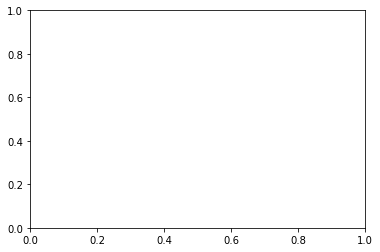

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
plt.scatter(
    proj_2d[:, 0],
    proj_2d[:, 1], s=2, c=df_jac_sim_cell_type.cell_type)

In [ ]:

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=df.species, labels={'color': 'species'}
)